In [91]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
df_demographics = pd.read_csv('community_demographics.csv')
df_indicators = pd.read_csv('community_indicators.csv')

In [92]:
df_indicators.drop(columns=['COMMUNITY AREA NAME', 'PERCENT OF HOUSING CROWDED', 'PERCENT HOUSEHOLDS BELOW POVERTY', 'PERCENT AGED 16+ UNEMPLOYED', 'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA', 'PERCENT AGED UNDER 18 OR OVER 64'], inplace=True)
df_indicators.columns = ['number', 'Per Capita Income', 'Hardship Index']
df_indicators.fillna(0, inplace=True)
df_indicators['number'] = df_indicators['number'].astype(int)
df_indicators.head()

,number,Per Capita Income,Hardship Index
0,1,23939,39.0
1,2,23040,46.0
2,3,35787,20.0
3,4,37524,17.0
4,5,57123,6.0


In [132]:
communities={'Rogers Park','West Ridge','Uptown','Lincoln Square','Lincoln Park','Near North Side',
'Edison Park','Norwood Park','Jefferson Park','Forest Glen','North Park','Albany Park','Portage Park','Irving Park',
'Montclare','Hermosa','Avondale','Logan Square','Humboldt Park','Austin',
'Near West Side','North Lawndale','South Lawndale','Lower West Side','Loop','Near South Side','Armour Square',
'Douglas','Oakland','Grand Boulevard','Kenwood','Washington Park','Hyde Park','Woodlawn','Chatham',
'Avalon Park','Burnside','Calumet Heights','Roseland','Pullman','South Deering','East Side',
'Riverdale','Archer Heights','Brighton Park','Mckinley Park','Bridgeport','New City','West Elsdon',
'Gage Park','West Lawn','Chicago Lawn','Ashburn','Auburn Gresham',
'Beverly','Morgan Park',"O'Hare",'Edgewater'}

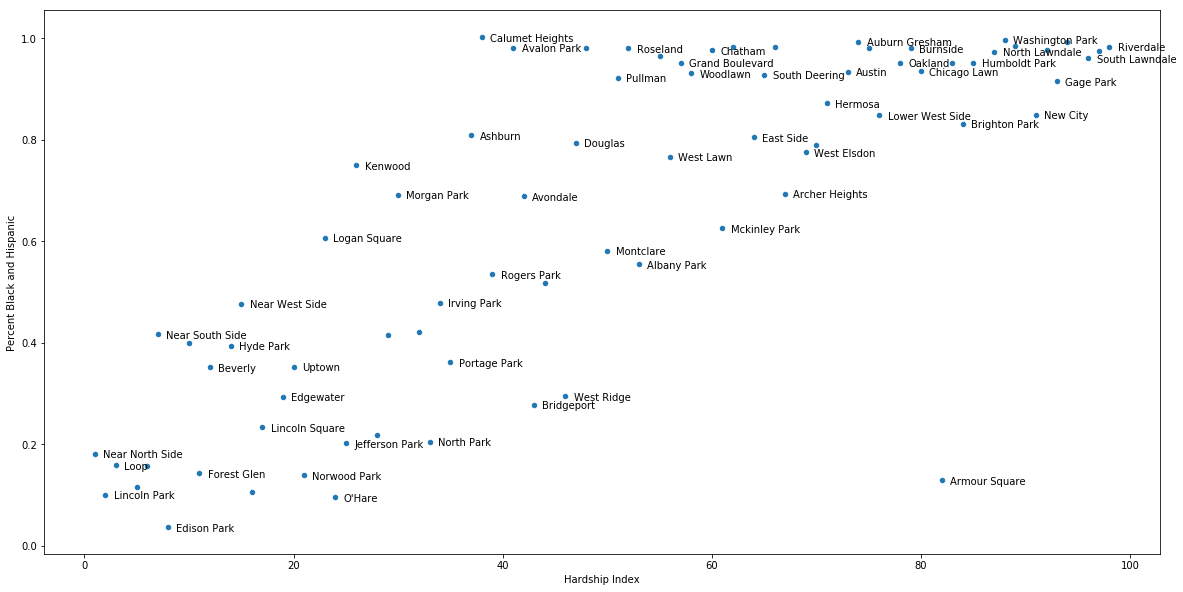

In [133]:
df_hardship = pd.merge(df_indicators, df_demographics, on=['number'])
# df_hardship['Percent Non Black or Hispanic'] = 100 - df_hardship['Percent Black'] - df_hardship['Percent Hispanic']
df_hardship['Percent Black'] = df_hardship['Percent Black'].str.rstrip('%').astype('float') / 100.0
df_hardship['Percent Hispanic'] = df_hardship['Percent Hispanic'].str.rstrip('%').astype('float') / 100.0
df_hardship['Percent Black and Hispanic'] = df_hardship['Percent Black'] + df_hardship['Percent Hispanic']
plot = df_hardship.plot(kind='scatter', x='Hardship Index', y='Percent Black and Hispanic', figsize=[20,10])
for i, point in df_hardship.iterrows():
    if point['Community'] in communities:
        plot.text(point['Hardship Index']+0.8, point['Percent Black and Hispanic']-.008, str(point['Community']))
# df_hardship

,number,Community_x,Per Capita Income,Hardship Index,Community_y,geometry,Percent Black,Percent Hispanic,Median Income,Poverty Rate,Unemployment Rate,Total Population
0,1,Rogers Park,23939,39.0,Rogers Park,<Polygon><outerBoundaryIs><LinearRing><coordin...,27.8%,25.7%,42622.0,23.9,6.9%,"56,125"
1,2,West Ridge,23040,46.0,West Ridge,<Polygon><outerBoundaryIs><LinearRing><coordin...,10.5%,19.0%,50060.0,17.0,4.4%,"71,915"
2,3,Uptown,35787,20.0,Uptown,<Polygon><outerBoundaryIs><LinearRing><coordin...,19.4%,15.9%,45697.0,24.9,6.6%,"60,070"
3,4,Lincoln Square,37524,17.0,Lincoln Square,<Polygon><outerBoundaryIs><LinearRing><coordin...,4.8%,18.6%,55143.0,13.4,4.9%,"40,971"
4,5,North Center,57123,6.0,North Center,<Polygon><outerBoundaryIs><LinearRing><coordin...,2.4%,13.3%,81920.0,6.6,4.4%,"34,623"
5,6,Lake View,60058,5.0,Lake View,<Polygon><outerBoundaryIs><LinearRing><coordin...,3.5%,8.0%,80966.0,10.1,3.0%,"99,544"
6,7,Lincoln Park,71551,2.0,Lincoln Park,<Polygon><outerBoundaryIs><LinearRing><coordin...,5.0%,5.1%,98243.0,9.8,4.4%,"69,518"
7,8,Near North Side,88669,1.0,Near North Side,<Polygon><outerBoundaryIs><LinearRing><coordin...,13.0%,5.1%,64435.0,13.4,5.4%,"77,412"
8,9,Edison Park,40959,8.0,Edison Park,<Polygon><outerBoundaryIs><LinearRing><coordin...,0.0%,3.7%,83817.0,2.9,2.8%,"11,715"
9,10,Norwood Park,32875,21.0,Norwood Park,<Polygon><outerBoundaryIs><LinearRing><coordin...,0.4%,13.5%,67862.0,5.0,2.3%,"41,097"
